In [9]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import math

In [11]:
import seaborn as sns

## Monte Carlo Simulation for Posterior Distribution

In [12]:
def u(x,a,s):
    if a == 0:
        return (1/6*s)*x + 0.5
    else: 
        def b(x):
            return 1-math.e**(-a*x)
        return (b(x)-b(-3*s))/(b(3*s)-b(-3*s))

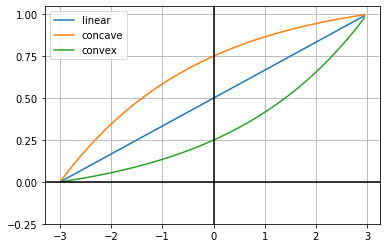

In [13]:
X = np.arange(-3,3,0.05)
Y1 = [u(x,0.367,1) for x in X]
Y2 = [u(x,-0.367,1) for x in X]
Y3 = [u(x,0,1) for x in X] 
plt.plot(X,Y3, label='linear') 
plt.plot(X,Y1, label='concave') 
plt.plot(X,Y2, label='convex') 
plt.axvline(0, color='k')
plt.axhline(0, color='k')

import matplotlib.ticker as plticker


plt.yticks(np.arange(-.25, 1.25, 0.25))

plt.grid(which='major', axis='both', linestyle='-')
plt.legend()

In [14]:
def us(x_list, a, s): #utility function for the list of values           
    return [u(x, a, s) for x in x_list]

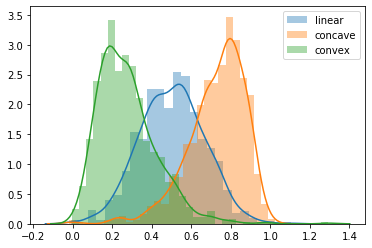

In [15]:
nor_x = np.random.normal(0,1,1000)
sns.distplot(us(nor_x, 0, 1), label='linear')
sns.distplot(us(nor_x, 0.367, 1), label='concave')
sns.distplot(us(nor_x, -0.367, 1), label='convex')
plt.legend()

## PDS in multattribute utility

In [39]:
def cal_post_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    for k in range(10000):
        x = []
        eu = []
        
        for j in range(m): #loop for generating mu alternatives
            
            n = len(mu) #number of attributes
            x_j = [np.random.lognormal(mu[i], s[i],1)[0] for i in range(n)] #generate true mu of one alternative
            x.append(cal_u(x_j)) #append u(x) of one mu alternative
            
            y_j = [np.random.lognormal(math.log(x_j[i])-((t[i]**2)/2) , t[i],1)[0] for i in range(n)] #generate estimated mu of one alternative
            u_x_jp_l = [] #list to store 1000 u(x) of posterior u of one mu alternative 
            for z in range(10):
                x_jp = []
                u_x_jp = []
                
                for i in range(n): #loop for generating posterior mu for one alternative
                    p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*(math.log(y_j[i])+((t[i]**2)/2))
                    p_var = (s[i]**2*t[i]**2/(s[i]**2 + t[i]**2)) 

                    x_ji = np.random.lognormal(p_mean, np.sqrt(p_var),1)[0]
                    u_x_ji = u(x_ji, a[i], 1)
                    u_x_jp.append(u_x_ji) #append u(x) of one posterior alternative (repeated 1000 times)
            
                u_x_jp_l.append(u_x_jp)
                
            e = np.mean(u_x_jp_l, axis=0) # E[u(x)|y]  
            eu.append(np.dot(w,e)) #append append w_i*E[u(x)|y]

        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (x[max_j] - max_eu)/max_eu
        d_list.append(d)
        #Compute the difference $u(x_\tilde{j})-\sum_{k=1}^1000 u_(x_\tilde{j}k)$
    return d_list


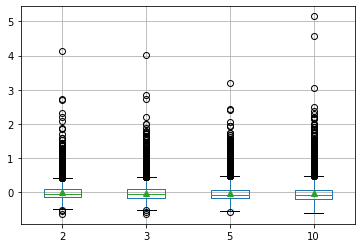

2    -0.006322
3    -0.012188
5    -0.021314
10   -0.031804
dtype: float64


In [40]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

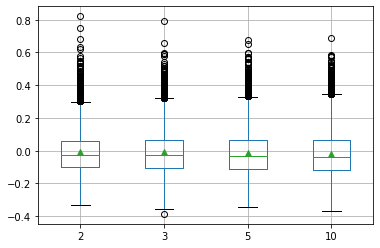

2    -0.009398
3    -0.008320
5    -0.014334
10   -0.018005
dtype: float64


In [41]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a=[0.1,0.1,0.1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

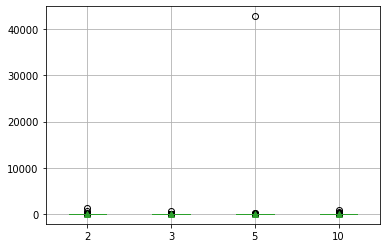

2     0.200556
3     0.055355
5     4.288491
10    0.170552
dtype: float64


In [42]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_mu(m=m, a=[-0.1,-0.1,-0.1])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [43]:
def cal_post_wrong_mu(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    d_mu_list = []
    
    for k in range(10000):
        x = [] #place holder for alternatives
        mx = []
        eu = [] #place holder for posterior estimated utilties
        meu = []
        
        for j in range(m): #loop for generating mu alternatives
            n = len(mu) #number of attributes
            x_j = [np.random.lognormal(mu[i], s[i],1)[0] for i in range(n)] #generate true m u of one alternative
            x.append(cal_u(x_j)) #append u(x) of one mu alternative
            ux_j= np.array([u(x_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            mx.append(ux_j)
            
            y_j = [np.random.lognormal(math.log(x_j[i])-((t[i]**2)/2), t[i],1)[0] for i in range(n)] #generate estimated m u of one alternative
            
            x_jp = []
            
            for i in range(n): #loop for generating posterior m u for one alternative
                p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*(math.log(y_j[i])+((t[i]**2)/2))
                p_var = (s[i]**2*t[i]**2/(s[i]**2 + t[i]**2)) 

                x_p_ji = list(np.random.lognormal(p_mean, np.sqrt(p_var),1000)) #generate 1000 of one attribute 
                x_jp.append(np.mean(x_p_ji)) #append average of that single attribute E[Xji|Y]
                
            eu.append(cal_u(x_jp)) #calculate m u of one alternative
            ux_jp = np.array([u(x_jp[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            meu.append(ux_jp)
        
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (x[max_j] - max_eu)#/max_eu
        d_list.append(d)
        d_mu = (mx[max_j]-meu[max_j])#/meu[max_j]
        d_mu_list.append(d_mu)
        
    return d_list

## varying number of alternative

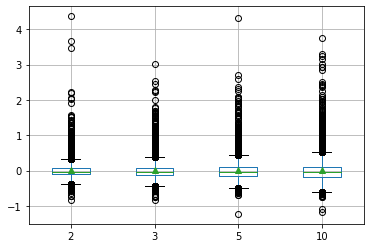

2     0.002494
3     0.000175
5     0.000836
10    0.002962
dtype: float64


In [44]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m)
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

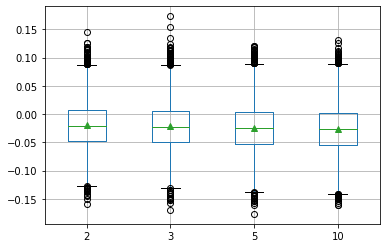

2    -0.019793
3    -0.021555
5    -0.024151
10   -0.026505
dtype: float64


In [45]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, a=[0.367,0.367,0.367])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

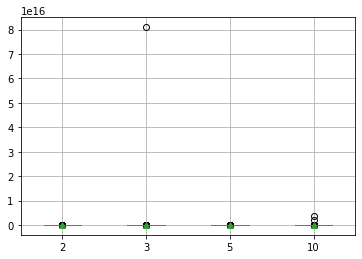

2     7.505615e+06
3     8.096260e+12
5     3.933895e+06
10    5.851852e+11
dtype: float64


In [46]:
d = {}
for m in [2,3,5,10]:
    d[m] = cal_post_wrong_mu(m=m, a=[-0.367,-0.367,-0.367])
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

## Varying number of attributes

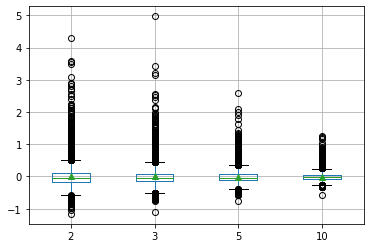

2    -0.000251
3     0.004283
5    -0.002017
10   -0.000628
dtype: float64


In [47]:
d = {}
for n in [2,3,5,10]:
    d[n] = cal_post_wrong_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0]*n )
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

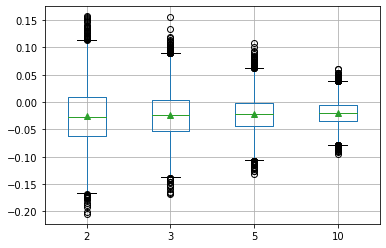

2    -0.026098
3    -0.023626
5    -0.022242
10   -0.019871
dtype: float64


In [48]:
d = {}
for n in [2,3,5,10]:
    d[n] = cal_post_wrong_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0.367]*n )
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

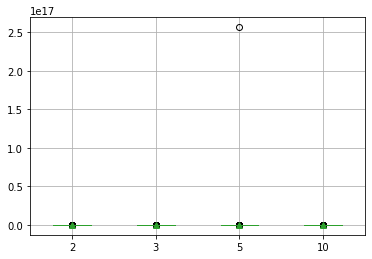

2     1.073353e+06
3     1.803110e+06
5     2.566194e+13
10    3.300710e+09
dtype: float64


In [49]:
d = {}
for n in [2,3,5,10]:
    d[n] = cal_post_wrong_mu(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[-0.367]*n )
    
df = pd.DataFrame(d)
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

new function to compare attribute specific differences

In [ ]:
def cal_post_wrong_mu2(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    d_mu_list = []
    
    for k in range(10000):
        x = [] #place holder for alternatives
        mx = []
        eu = [] #place holder for posterior estimated utilties
        meu = []
        
        for j in range(m): #loop for generating mu alternatives
            n = len(mu) #number of attributes
            x_j = [np.random.lognormal(mu[i], s[i],1)[0] for i in range(n)] #generate true m u of one alternative
            x.append(cal_u(x_j)) #append u(x) of one mu alternative
            ux_j= np.array([u(x_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            mx.append(ux_j)
            
            y_j = [np.random.lognormal(math.log(x_j[i])-((t[i]**2)/2), t[i],1)[0] for i in range(n)] #generate estimated m u of one alternative
            
            x_jp = []
            
            for i in range(n): #loop for generating posterior m u for one alternative
                p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*(math.log(y_j[i])+((t[i]**2)/2))
                p_var = (s[i]**2*t[i]**2/(s[i]**2 + t[i]**2)) 

                x_p_ji = list(np.random.lognormal(p_mean, np.sqrt(p_var),1000)) #generate 1000 of one attribute 
                x_jp.append(np.mean(x_p_ji)) #append average of that single attribute E[Xji|Y]
                
            eu.append(cal_u(x_jp)) #calculate m u of one alternative
            ux_jp = np.array([u(x_jp[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            meu.append(ux_jp)
        
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (x[max_j] - max_eu)#/max_eu
        d_list.append(d)
        d_mu = (mx[max_j]-meu[max_j])#/meu[max_j]
        d_mu_list.append(d_mu)
        
    return d_list, d_mu_list

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[-0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1,1,10,1,5], t=[1]*n, w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1,1,10,1,5], t=[1]*n, w=[1/n]*n, a=[0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1,1,10,1,5], t=[1]*n, w=[1/n]*n, a=[-0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1,1,10,1,5], w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1,1,10,1,5], w=[1/n]*n, a=[0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1,1,10,1,5], w=[1/n]*n, a=[-0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[0.1, 0.1, 0.6, 0.1, 0.1], a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[0.1, 0.1, 0.6, 0.1, 0.1], a=[0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[0.1, 0.1, 0.6, 0.1, 0.1], a=[-0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

### experimentation with relative values

In [ ]:
def cal_post_wrong_mu2_r(m=5, mu=[0,0,0], s=[1,1,1], t=[1,1,1], w=[1/3, 1/3, 1/3], a=[0,0,0]):
    
    def cal_u(multiatt):
        ul = [u(multiatt[i], a[i], 1) for i in range(len(multiatt))]
        return np.dot(w, ul)
    
    d_list = []
    d_mu_list = []
    
    for k in range(10000):
        x = [] #place holder for alternatives
        mx = []
        eu = [] #place holder for posterior estimated utilties
        meu = []
        
        for j in range(m): #loop for generating mu alternatives
            n = len(mu) #number of attributes
            x_j = [np.random.lognormal(mu[i], s[i],1)[0] for i in range(n)] #generate true m u of one alternative
            x.append(cal_u(x_j)) #append u(x) of one mu alternative
            ux_j= np.array([u(x_j[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            mx.append(ux_j)
            
            y_j = [np.random.lognormal(math.log(x_j[i])-((t[i]**2)/2), t[i],1)[0] for i in range(n)] #generate estimated m u of one alternative
            
            x_jp = []
            
            for i in range(n): #loop for generating posterior m u for one alternative
                p_mean = (t[i]**2/(s[i]**2 + t[i]**2))*mu[i] + (s[i]**2/(s[i]**2 + t[i]**2))*(math.log(y_j[i])+((t[i]**2)/2))
                p_var = (s[i]**2*t[i]**2/(s[i]**2 + t[i]**2)) 

                x_p_ji = list(np.random.lognormal(p_mean, np.sqrt(p_var),1000)) #generate 1000 of one attribute 
                x_jp.append(np.mean(x_p_ji)) #append average of that single attribute E[Xji|Y]
                
            eu.append(cal_u(x_jp)) #calculate m u of one alternative
            ux_jp = np.array([u(x_jp[i], a[i],1) for i in range(n)]) #utilities of individual attributes
            meu.append(ux_jp)
        
        #Choose the alternative $j^$ with the highest expected utility
        max_eu = max(eu)
        max_j = eu.index(max_eu)

        #posterior disappointment 
        d = (x[max_j] - max_eu)/max_eu
        d_list.append(d)
        d_mu = (mx[max_j]-meu[max_j])/meu[max_j]
        d_mu_list.append(d_mu)
        
    return d_list, d_mu_list

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[1/n]*n, a=[-0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1,1,10,1,5], t=[1]*n, w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1,1,10,1,5], t=[1]*n, w=[1/n]*n, a=[0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1,1,10,1,5], t=[1]*n, w=[1/n]*n, a=[-0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1]*n, t=[1,1,10,1,5], w=[1/n]*n, a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1]*n, t=[1,1,10,1,5], w=[1/n]*n, a=[0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1]*n, t=[1,1,10,1,5], w=[1/n]*n, a=[-0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[0.1, 0.1, 0.6, 0.1, 0.1], a=[0]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[0.1, 0.1, 0.6, 0.1, 0.1], a=[0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [ ]:
n = 5
r = cal_post_wrong_mu2_r(m=5, mu=[0]*n,s=[1]*n, t=[1]*n, w=[0.1, 0.1, 0.6, 0.1, 0.1], a=[-0.367]*n )
df = pd.DataFrame(r[1])
df.boxplot(showmeans=True)
plt.show()
print(df.mean(axis=0))

In [139]:
np.array([1,2,3])/np.array([1,2,3])

array([1., 1., 1.])

In [140]:
cal_post_wrong_mu()

x [0.45269041266433596, 0.5045642798786146, 0.5793808093468004, 0.5955283081624783, 0.6099808094854265]
eu [0.4708963197821912, 0.4630712955110071, 0.5497432187308224, 0.6375502879459963, 0.6074488834130541]
x_mu [[0.19649906445805235, 0.31760729125764625, -1.365678927757651], [-0.023861309714376947, 0.5842720694719032, -0.4782537219424622], [0.26404555217777137, -0.27876530394243526, 1.4435743200070708], [-1.1072719242351443, 1.7886199859145586, 1.0381614852451966], [1.772321893456638, 1.0227629678411114, -0.8154302905600702]]
eu_mu [[0.02579952270762941, -0.15593871344135574, -0.39372705318683165], [-0.4629287322128214, 0.21463005361985785, -0.41641800220890846], [-0.37375418002713734, -0.02608954857886661, 1.2952216657608095], [-0.23743517360921687, 1.6615656043485072, 1.0517747522886447], [1.2550656450686948, 0.6776334455438985, 0.0013808108223825365]]
max_j 3
mu_d [ 3.66347049  0.07646667 -0.01294314]


[-0.06591163172226117]

In [153]:
us([ 3.66347049,  0.07646667, -0.01294314],0,1)

[1.110578415, 0.512744445, 0.49784281]

In [123]:
np.mean([-0.85169503, -0.54641431,  0.86048927])

-0.17920669

In [113]:
np.array([1,2,3])-np.array([1,2,0])

array([0, 0, 3])

In [64]:
z = us([0.9035373386713624, 0.05176266452648585, 1.1331369033505083], 0, 1)
np.dot(z, [1/3, 1/3, 1/3])

0.6160242725860198

In [48]:
np.dot([0.08213102210277401, 0.02253875570099081, 0.606858128895362], [1/3, 1/3, 1/3])

0.23717596889970893

In [65]:
cal_post_wrong_mu()

x_j [-0.09354329987943721, -0.19598317528313586, -1.3133991997242174]
x_jp [-0.6988756756168393, 0.032011961721316956, 0.38866154724476437]
x_j [-0.0019675335093545516, -0.06699434838752677, -0.5623745305193203]
x_jp [0.39027643273097035, -0.08867289772565974, 0.20179322029650154]
x_j [-0.7728457424179799, -1.9096461822639843, 0.3116557268994388]
x_jp [-1.1507481410096352, -0.2877922554794725, -0.07299695179391431]
x_j [0.6216593728632329, -0.6041898190400277, 1.7372859312617048]
x_jp [0.1863090834109792, -0.0888758683617855, 1.543473391449911]
x_j [2.6421016499495784, 0.17588877731121672, -1.4635935509359577]
x_jp [1.3015153492221982, -0.16038423388455122, -1.1366032779491617]
x [0.4109485736174005, 0.46492575486576654, 0.3682868779009708, 0.5974864158380505, 0.5752442709069354]
eu [0.48454432407495784, 0.5279664864056562, 0.41602570287316537, 0.5911614781388391, 0.5002515465215825]
max_eu 0.5911614781388391
max_j 3
x_mu [0.6216593728632329, -0.6041898190400277, 1.7372859312617048]
eu

[0.01069917092555534]

In [67]:
z = us([0.1863090834109792, -0.0888758683617855, 1.543473391449911], 0, 1)
np.dot(z, [1/3, 1/3, 1/3])

0.5911614781388391

Simulation to measure relationship between argmax true u and argmax posterior u

In [2]:
import numpy as np

In [23]:
m = 5 #number of alternatives
mu = 0
s = 1 #std for m_j
t = 1 #std for y_j
a = 0#for convex <0, concave >0

true_l = []
post_l = []

d_list = []
for c in range(10000):

    #Generate $m$ true values $x_j$ from the prior
    x = np.random.normal(mu,s,m) #x_j~N(0,1)
    true_l.append(np.argmax(x))
    
    #For each true value, generate an estimate $y_j$ from the likelihood 
    y = [np.random.normal(x_j,t,1)[0] for x_j in x] #y_j~N(x_j,1)

    #For each $y_j$, generate 1000 true values $x_jk$ from $(X|Y=y)=N(sigma^2/(tau^2 +sigma^2)*y_j+tau^2/(sigma^2+tau^2)*overline(mu)), k=1,...1000$
    x_p = []
    for y_j in y:
        p_mean = (t**2/(s**2 + t**2))*mu + (s**2/(s**2 + t**2))*y_j
        x_p.append(p_mean)

    eu = [u(x,a) for x in x_p]

    #Choose the alternative $j^$ with the highest expected utility
    max_eu = max(eu)
    max_j = eu.index(max_eu)
    post_l.append(max_j)
    #posterior disappointment 
    d = u(x[max_j],a) - max_eu 
    d_list.append(d)



In [30]:
np.sum(np.array(true_l) == np.array(post_l))/len(true_l)

0.5399